In [1]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io.wavfile
from pydub import AudioSegment

In [2]:
def specshow(audio_path: str, start: float, end: float, ax=plt, fmin=50, fmax=350, extra_sec=0.1):
    y, sr = librosa.load(audio_path, sr=16000)
    start, end = librosa.time_to_samples([start - extra_sec, start + end + extra_sec], sr=sr)
    if start < 0:
        start = 0
    y = y[start:end]
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, n_fft=2048, hop_length=16, fmin=fmin, fmax=fmax)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, fmin=fmin, fmax=fmax, cmap='magma', ax=ax)

    # plt.gca().xaxis.set_major_locator(plt.NullLocator())
    # plt.gca().yaxis.set_major_locator(plt.NullLocator())
    # plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    # plt.margins(0, 0)
    # plt.show()

In [3]:
import json

align = json.load(open('align.json'))

In [4]:
import random

# randomly sample 5 audio files
samples = []
for i in range(5):
    samples.append(random.choice(align[str(i)]))

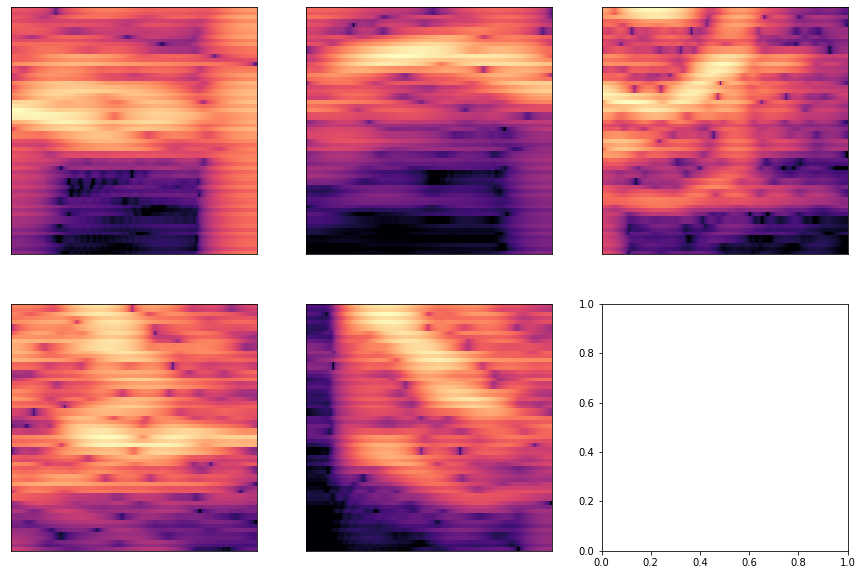

In [5]:
data_root = '/NASdata/AudioData/mandarin/AISHELL-2/iOS/data/wav/'
os.makedirs('tmp', exist_ok=True)
f, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i in range(5):
    file, phone, start, dur = samples[i]
    spk = file[1:6]
    specshow(os.path.join(data_root, spk, f'{file}.wav'), start, dur, ax=axs[i])